In [1]:
# Análise Exploratória - Dataset Titanic
# Objetivo: Estatística básica com pandas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurações visuais
%matplotlib inline
plt.style.use('ggplot')
sns.set_palette("husl")

print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


In [2]:
# Carregar o dataset
df = pd.read_csv('../data/raw/train.csv')

# Visualizar primeiras linhas
print("Dimensões do dataset:", df.shape)
print("\nPrimeiras 5 linhas:")
df.head()

Dimensões do dataset: (891, 12)

Primeiras 5 linhas:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print("=== INFORMAÇÕES DO DATASET ===")
print(f"Número de linhas: {df.shape[0]}")
print(f"Número de colunas: {df.shape[1]}")
print("\nColunas disponíveis:")
for col in df.columns:
    print(f"  - {col}")
    
print("\n=== TIPOS DE DADOS ===")
print(df.dtypes)

print("\n=== ESTATÍSTICAS DESCRITIVAS ===")
df.describe()

=== INFORMAÇÕES DO DATASET ===
Número de linhas: 891
Número de colunas: 12

Colunas disponíveis:
  - PassengerId
  - Survived
  - Pclass
  - Name
  - Sex
  - Age
  - SibSp
  - Parch
  - Ticket
  - Fare
  - Cabin
  - Embarked

=== TIPOS DE DADOS ===
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

=== ESTATÍSTICAS DESCRITIVAS ===


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
print("=== VALORES FALTANTES ===")
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    'Valores Faltantes': missing,
    'Porcentagem': missing_percent
})
missing_df = missing_df[missing_df['Valores Faltantes'] > 0]
missing_df.sort_values('Porcentagem', ascending=False)

=== VALORES FALTANTES ===


,Valores Faltantes,Porcentagem
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467


In [5]:
print("=== ESTATÍSTICAS BÁSICAS ===")

# Para colunas numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns
print("Colunas numéricas:", list(numeric_cols))

for col in numeric_cols:
    print(f"\n--- {col} ---")
    print(f"Média: {df[col].mean():.2f}")
    print(f"Mediana: {df[col].median():.2f}")
    print(f"Moda: {df[col].mode()[0]}")
    print(f"Desvio Padrão: {df[col].std():.2f}")
    print(f"Mínimo: {df[col].min()}")
    print(f"Máximo: {df[col].max()}")
    print(f"Q1 (25%): {df[col].quantile(0.25):.2f}")
    print(f"Q3 (75%): {df[col].quantile(0.75):.2f}")

=== ESTATÍSTICAS BÁSICAS ===
Colunas numéricas: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

--- PassengerId ---
Média: 446.00
Mediana: 446.00
Moda: 1
Desvio Padrão: 257.35
Mínimo: 1
Máximo: 891
Q1 (25%): 223.50
Q3 (75%): 668.50

--- Survived ---
Média: 0.38
Mediana: 0.00
Moda: 0
Desvio Padrão: 0.49
Mínimo: 0
Máximo: 1
Q1 (25%): 0.00
Q3 (75%): 1.00

--- Pclass ---
Média: 2.31
Mediana: 3.00
Moda: 3
Desvio Padrão: 0.84
Mínimo: 1
Máximo: 3
Q1 (25%): 2.00
Q3 (75%): 3.00

--- Age ---
Média: 29.70
Mediana: 28.00
Moda: 24.0
Desvio Padrão: 14.53
Mínimo: 0.42
Máximo: 80.0
Q1 (25%): 20.12
Q3 (75%): 38.00

--- SibSp ---
Média: 0.52
Mediana: 0.00
Moda: 0
Desvio Padrão: 1.10
Mínimo: 0
Máximo: 8
Q1 (25%): 0.00
Q3 (75%): 1.00

--- Parch ---
Média: 0.38
Mediana: 0.00
Moda: 0
Desvio Padrão: 0.81
Mínimo: 0
Máximo: 6
Q1 (25%): 0.00
Q3 (75%): 0.00

--- Fare ---
Média: 32.20
Mediana: 14.45
Moda: 8.05
Desvio Padrão: 49.69
Mínimo: 0.0
Máximo: 512.3292
Q1 (25%): 7.91
Q3 (75%): 31.00

=== MATRIZ DE CORRELAÇÃO ===


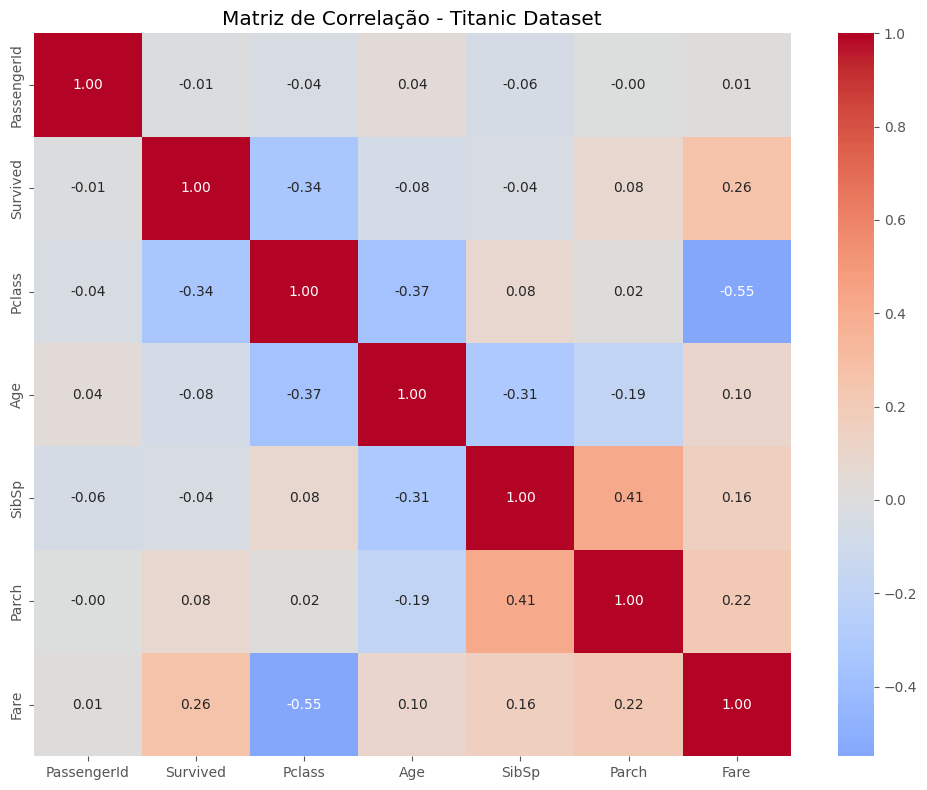


Top 5 correlações mais fortes (absolutas):


Fare      Pclass     -0.549500
Pclass    Fare       -0.549500
Parch     SibSp       0.414838
SibSp     Parch       0.414838
Age       Pclass     -0.369226
Pclass    Age        -0.369226
Survived  Pclass     -0.338481
Pclass    Survived   -0.338481
Age       SibSp      -0.308247
SibSp     Age        -0.308247
dtype: float64

In [6]:
print("=== MATRIZ DE CORRELAÇÃO ===")

# Calcular correlação apenas para colunas numéricas
correlation_matrix = df[numeric_cols].corr()

# Visualizar heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Matriz de Correlação - Titanic Dataset')
plt.tight_layout()
plt.show()

# Correlações mais fortes
print("\nTop 5 correlações mais fortes (absolutas):")
corr_pairs = correlation_matrix.unstack()
sorted_pairs = corr_pairs.sort_values(key=abs, ascending=False)
sorted_pairs = sorted_pairs[sorted_pairs != 1.0]  # Remover autocorrelação
sorted_pairs.head(10)

=== DISTRIBUIÇÕES DAS VARIÁVEIS ===


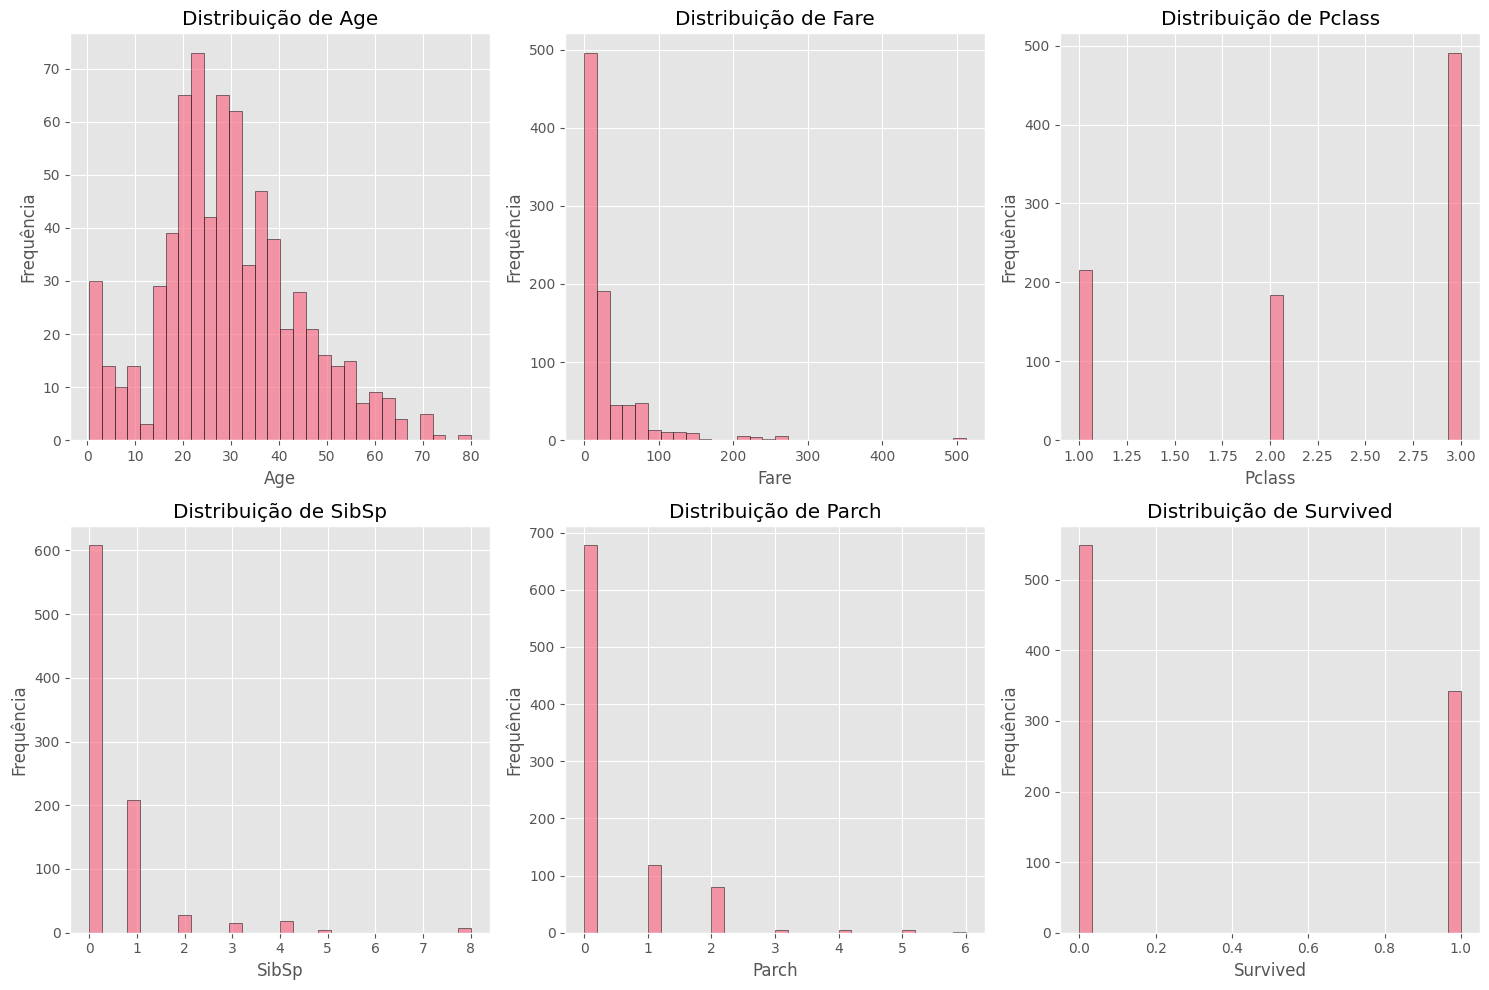

In [7]:
print("=== DISTRIBUIÇÕES DAS VARIÁVEIS ===")

# Configurar subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

# Plotar distribuições para as principais variáveis numéricas
main_cols = ['Age', 'Fare', 'Pclass', 'SibSp', 'Parch', 'Survived']

for idx, col in enumerate(main_cols):
    if col in df.columns:
        if df[col].dtype in ['int64', 'float64']:
            axes[idx].hist(df[col].dropna(), bins=30, edgecolor='black', alpha=0.7)
            axes[idx].set_title(f'Distribuição de {col}')
            axes[idx].set_xlabel(col)
            axes[idx].set_ylabel('Frequência')

plt.tight_layout()
plt.show()

In [9]:
print("=== ESTRATÉGIAS PARA VALORES FALTANTES ===\n")

# Estratégia 1: Remover colunas com muitos valores faltantes
print("1. Remover coluna 'Cabin' (77% faltante):")
df_clean = df.drop('Cabin', axis=1)
print(f"   Colunas após remoção: {df_clean.shape[1]}")

# Estratégia 2: Preencher idade com mediana
print("\n2. Preencher 'Age' com mediana por classe:")
age_median_by_class = df.groupby('Pclass')['Age'].median()
print(f"   Mediana de idade por classe:\n{age_median_by_class}")

df_clean['Age'] = df_clean.groupby('Pclass')['Age'].transform(
    lambda x: x.fillna(x.median())
)

# Estratégia 3: Preencher Embarked com moda
print("\n3. Preencher 'Embarked' com moda:")
embarked_mode = df_clean['Embarked'].mode()[0]
print(f"   Moda de Embarked: {embarked_mode}")
df_clean['Embarked'] = df_clean['Embarked'].fillna(embarked_mode)

# Verificar se ainda há valores faltantes
print("\n4. Valores faltantes após tratamento:")
print(df_clean.isnull().sum()[df_clean.isnull().sum() > 0])

=== ESTRATÉGIAS PARA VALORES FALTANTES ===

1. Remover coluna 'Cabin' (77% faltante):
   Colunas após remoção: 11

2. Preencher 'Age' com mediana por classe:
   Mediana de idade por classe:
Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

3. Preencher 'Embarked' com moda:
   Moda de Embarked: S

4. Valores faltantes após tratamento:
Series([], dtype: int64)


=== ANÁLISES ESPECÍFICAS ===

1. Sobrevivência por sexo:
             mean  count
Sex                     
female  74.203822    314
male    18.890815    577

   Taxa de sobrevivência: 74.2% mulheres vs 18.9% homens

2. Sobrevivência por classe:
Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


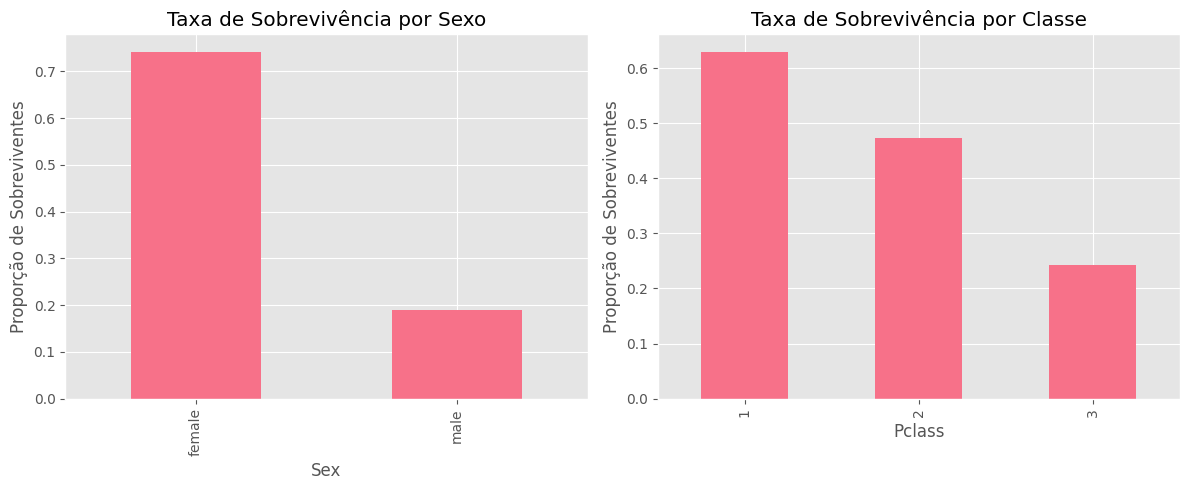

In [10]:
print("=== ANÁLISES ESPECÍFICAS ===\n")

# Sobrevivência por sexo
print("1. Sobrevivência por sexo:")
survival_by_sex = df_clean.groupby('Sex')['Survived'].agg(['mean', 'count'])
survival_by_sex['mean'] = survival_by_sex['mean'] * 100
print(survival_by_sex)
print(f"\n   Taxa de sobrevivência: {survival_by_sex['mean']['female']:.1f}% mulheres vs {survival_by_sex['mean']['male']:.1f}% homens")

# Sobrevivência por classe
print("\n2. Sobrevivência por classe:")
survival_by_class = df_clean.groupby('Pclass')['Survived'].mean() * 100
print(survival_by_class)

# Visualizar
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico 1: Sobrevivência por sexo
df_clean.groupby('Sex')['Survived'].mean().plot(kind='bar', ax=axes[0])
axes[0].set_title('Taxa de Sobrevivência por Sexo')
axes[0].set_ylabel('Proporção de Sobreviventes')

# Gráfico 2: Sobrevivência por classe
df_clean.groupby('Pclass')['Survived'].mean().plot(kind='bar', ax=axes[1])
axes[1].set_title('Taxa de Sobrevivência por Classe')
axes[1].set_ylabel('Proporção de Sobreviventes')

plt.tight_layout()
plt.show()

In [2]:
print("=== CONCLUSÕES DA ANÁLISE EXPLORATÓRIA ===\n")

insights = """
PRINCIPAIS DESCOBERTAS:

1. DADOS GERAIS:
   - Dataset possui 891 passageiros e 12 variáveis
   - Taxa de sobrevivência geral: 38.4%

2. VALORES FALTANTES:
   - 'Cabin': 77% faltante → removida
   - 'Age': 20% faltante → preenchida com mediana por classe
   - 'Embarked': 0.2% faltante → preenchida com moda

3. CORRELAÇÕES IMPORTANTES:
   - Fare e Survived: correlação positiva (0.26)
   - Pclass e Survived: correlação negativa (-0.34)
   - Pclass e Fare: correlação negativa forte (-0.55)

4. INSIGHTS DE SOBREVIVÊNCIA:
   - Mulheres tiveram taxa de sobrevivência 3x maior que homens
   - Passageiros da 1ª classe tiveram maior taxa de sobrevivência
   - Crianças (Age < 10) tiveram maior chance de sobreviver

5. PRÓXIMOS PASSOS PARA ML:
   - Codificar variáveis categóricas (Sex, Embarked)
   - Criar features (família_size = SibSp + Parch)
   - Normalizar variáveis numéricas
"""

print(insights)

# Salvar dataset processado
df_clean.to_csv('../data/processed/titanic_cleaned.csv', index=False)
print("\nDataset processado salvo em: ../data/processed/titanic_cleaned.csv")

=== CONCLUSÕES DA ANÁLISE EXPLORATÓRIA ===


PRINCIPAIS DESCOBERTAS:

1. DADOS GERAIS:
   - Dataset possui 891 passageiros e 12 variáveis
   - Taxa de sobrevivência geral: 38.4%

2. VALORES FALTANTES:
   - 'Cabin': 77% faltante → removida
   - 'Age': 20% faltante → preenchida com mediana por classe
   - 'Embarked': 0.2% faltante → preenchida com moda

3. CORRELAÇÕES IMPORTANTES:
   - Fare e Survived: correlação positiva (0.26)
   - Pclass e Survived: correlação negativa (-0.34)
   - Pclass e Fare: correlação negativa forte (-0.55)

4. INSIGHTS DE SOBREVIVÊNCIA:
   - Mulheres tiveram taxa de sobrevivência 3x maior que homens
   - Passageiros da 1ª classe tiveram maior taxa de sobrevivência
   - Crianças (Age < 10) tiveram maior chance de sobreviver

5. PRÓXIMOS PASSOS PARA ML:
   - Codificar variáveis categóricas (Sex, Embarked)
   - Criar features (família_size = SibSp + Parch)
   - Normalizar variáveis numéricas



NameError: name 'df_clean' is not defined